In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from functions.wrapper import evaluate_model

import gmr

In [2]:
from scipy.stats import norm

def synthetic_data():
    state = [0, 1, 2]
    means = [[3, 1], [5, 1], [7, 1]]
    np.random.seed(0)

    n = 9000
    y = np.array([np.random.normal(loc=means[s][0], scale=means[s][1], size=n//len(state)) for s in state]).flatten()
    np.random.shuffle(y)
    x_1 = np.random.uniform(low=1, high=9, size=n)
    x_2 = np.random.uniform(low=1, high=9, size=n)
    x_3 = np.random.uniform(low=1, high=9, size=n)
    X = np.column_stack((x_1, x_2, x_3))

    y_test = np.linspace(1, 9, 70)
    x_test = np.ones_like(y_test) * 5
    X_test = np.column_stack((x_test, x_test, x_test))

    # Compute true NLL assuming equal mixture weights
    pdfs = np.mean([norm.pdf(y_test, loc=means[s][0], scale=means[s][1]) for s in range(3)], axis=0)
    y_true = -np.log(pdfs)

    return {
        "y_train": y,
        "y_test": y_test,
        "x_1": x_1,
        "x_test": x_test,
        "X_train": X,
        "X_test": X_test,
        "y_true": y_true,
        "pdfs": pdfs
    }
synthetic_data = synthetic_data()

In [3]:
x_test = synthetic_data["X_test"]
y_test = synthetic_data["y_test"]

X_test = np.array(x_test)
X_test = np.hstack((X_test.reshape(-1, X_test.shape[1]), np.array(y_test).reshape(-1, 1)))

In [4]:
x_train = synthetic_data["X_train"]
y_train = synthetic_data["y_train"]

X_train = np.array(x_train).reshape(-1, x_train.shape[1])
X_train = np.hstack((X_train, np.array(y_train).reshape(-1, 1)))

In [5]:
hmm_r = evaluate_model(
        model='hmm',
        y_train=synthetic_data["y_train"],
        y_test=synthetic_data["y_test"],
        x_train=synthetic_data["X_train"],
        x_test=synthetic_data["X_test"],
        n_states=3
    )['NLL']
hmm_pdf = np.exp(-hmm_r)

gmr_r = evaluate_model(
        model='gmr',
        y_train=synthetic_data["y_train"],
        y_test=synthetic_data["y_test"],
        x_train=synthetic_data["X_train"],
        x_test=synthetic_data["X_test"],
        n_states=3
    )['NLL']
gmr_pdf = np.exp(-gmr_r)

R[write to console]: code for methods in class “Rcpp_model_base” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_model_base” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_stan_fit” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_stan_fit” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_stan_fit4model_tmb” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_stan_fit4model_tmb” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)



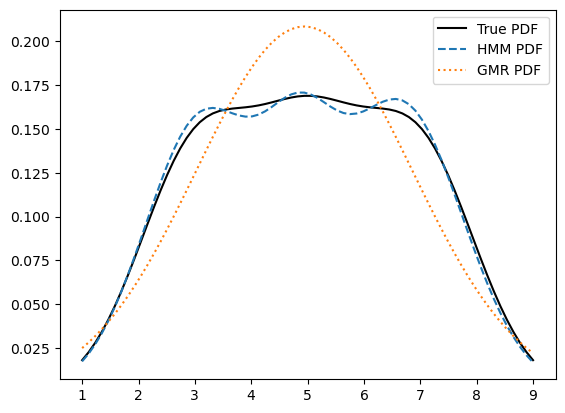

In [6]:
plt.plot(synthetic_data["y_test"], synthetic_data["pdfs"], label='True PDF', color='black')
plt.plot(synthetic_data["y_test"], hmm_pdf, label='HMM PDF', linestyle='dashed')
plt.plot(synthetic_data["y_test"], gmr_pdf, label='GMR PDF', linestyle='dotted')
plt.legend()

In [4]:
result = evaluate_model(
        model='hmm',
        y_train=synthetic_data["y_train"],
        y_test=synthetic_data["y_test"],
        n_states=3
    )
result

R[write to console]: code for methods in class “Rcpp_model_base” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_model_base” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_stan_fit” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_stan_fit” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_stan_fit4model_tmb” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

R[write to console]: code for methods in class “Rcpp_stan_fit4model_tmb” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)



{'NLL': array([2.47755508, 1.84801732, 1.85047228, 1.77007397, 1.83148501,
        1.85364961, 2.55806649]),
 'SNLL': 14.189319751268997}

In [5]:
result = evaluate_model(
        model='gmr',
        y_train=synthetic_data["y_train"],
        y_test=synthetic_data["y_test"],
        n_states=3
    )
result

{'NLL': array([1.99957894, 1.42163604, 1.28423243, 1.23366824, 1.29590391,
        1.44407993, 2.02105003]),
 'SNLL': np.float64(10.700149513935575)}

In [6]:
for model in ["gmr", "hmm"]:
    result = evaluate_model(
        model=model,
        y_train=synthetic_data["y_train"],
        y_test=synthetic_data["y_test"],
        n_states=3
    )
    np.testing.assert_allclose(result["NLL"], synthetic_data["y_true"], rtol=0.05, atol=0.1)

AssertionError: 
Not equal to tolerance rtol=0.05, atol=0.1

Mismatched elements: 7 / 7 (100%)
Max absolute difference among violations: 0.52672485
Max relative difference among violations: 0.29016056
 ACTUAL: array([2.005522, 1.429671, 1.288563, 1.274782, 1.292871, 1.43391 ,
       2.012834])
 DESIRED: array([2.499395, 1.890327, 1.815288, 1.778006, 1.815288, 1.890327,
       2.499395])

In [7]:
for model in ["gmr", "hmm"]:
    result = evaluate_model(
        model=model,
        y_train=synthetic_data["y_train"],
        y_test=synthetic_data["y_test"],
        x_train=synthetic_data["x_1"],
        x_test=synthetic_data["x_test"],
        n_states=3
    )
    np.testing.assert_allclose(result["NLL"], synthetic_data["y_true"], rtol=0.05, atol=0.1)

In [9]:
synthetic_data["X_train"]

array([[4.95696342, 6.97061814, 4.25625417],
       [1.30218209, 3.78266728, 5.94790571],
       [4.85285037, 7.67997921, 1.8829493 ],
       ...,
       [5.54333906, 3.91720053, 6.22537805],
       [8.86298238, 5.56979733, 8.57206439],
       [4.33139201, 4.52835145, 2.00144918]], shape=(9000, 3))

In [18]:
synthetic_data["X_train"].ndim

2

In [10]:
for model in ["gmr", "hmm"]:
    result = evaluate_model(
        model=model,
        y_train=synthetic_data["y_train"],
        y_test=synthetic_data["y_test"],
        x_train=synthetic_data["X_train"],
        x_test=synthetic_data["X_test"],
        n_states=3
    )
    np.testing.assert_allclose(result["NLL"], synthetic_data["y_true"], rtol=0.05, atol=0.1)

ValueError: cannot reshape array of size 21 into shape (2)